# The Funding For Our Future

# Overview

We analyzed the correlation between expenditures per pupil and markers of academic performance, like test scores and graduation rates, to see if there was a positive correlation. We used datasets from the New York State Department of Education’s  public record. We cleaned then joined these datasets by individual school or district so that we could carry out our analyses.  We made several data visualizations to help us see any trends in the data and the relation between variables. Then, we used statistical analyses to explore if there was any relation between expenditures and academic performance for students in New York. 

# Names

- Sanskriti Chadha
- Arjun Gujral
- Elakya Thirumoorthy
- Viswesh Uppalapati

# Research Question

Does increased funding increase academic performance, such as test scores and graduation rates, in public school districts in New York?

## Background and Prior Work

#### Background

We started by taking a look at the New York Public Education system. Different counties receive different amounts of funding from the government based on several factors such as housing prices, school fundraising, attendance rates, and population. This funding comes from a federal, state, and local source. It goes into educational opportunities and resources for the educational staff and students, impacting their experience in school.

Different grade levels require different amounts of support from the school. Different age groups are fundamental turning points for childhood academic development. This means some age groups might need more academic support than others. Schools have to prioritize where to allocate these resources while trying to maintain as little of a disparity as possible despite having varying levels of funding compared to other school districts and counties. 

There are other factors that might affect the population and funding such as the ethnic and racial demographics of the different counties, crime rates by counties, and the amount of teaching staff. These confounding factors mean that it will be difficult to determine anything causationally between expenditures and student performance.




#### Prior Work: 

While researching, we found two projects that were similar to ours: How Money Matters for Schools and Equity and Quality in Education:

In How Money Matters for Schools, the study analyzed how much of the disparity between academic performance of students is due to funding and resources. The study disproves previous theories that money doesn’t have an impact on education, and shows that schools with low-income minority students that get adequate funding is directly impactful to their graduation rates and testing scores. They specifically found that a 21.7% increase in per student spending for all 12 years would get rid of the disparity between low income students and non poor students. 

In Equity and Quality in Education, the study discusses how the quality of the educational staff such as the teachers matter greatly. On top of that, the access that schools have to equitable resources has a large impact as well. This directly affects how well they do in school. This sometimes means that schools with more minority students and other disadvantaged populations might need even more resources or funding to be able to test or perform at the same level as students that are more well off. This is due to the fact that equity means giving the resources necessary to succeed. Just providing equal resources quantitatively is not enough, as different students and teachers come from different backgrounds. This means that sometimes, some people need more resources than others to have the same experience. 


**References:**

1) https://learningpolicyinstitute.org/product/how-money-matters-brief

2) https://www.oecd.org/education/school/50293148.pdf


# Hypothesis


We hypothesize that in the state of New York, the more funding that is given per pupil, the better the academic performance of the student. We believe that this is the case because our prior background research shows that the more access students and staff have to resources and support, they perform better in quantifiable ways. 


# Dataset(s)

All three datasets are from the 2019 Report Card database report found at this link: https://data.nysed.gov/downloads.php
 
Dataset 1: Expenditures
	Number of observations: 5359 
This dataset had all the expenditures per pupil on a federal, state, and local level in New York. It was organized by school and district. 
 
Dataset 2: ACC HS Composite Performance
	Number of observations: 156030
This dataset has the annual state test scores ( Composite Performance Index) of students in New York, and these test scores are a composite score, derived from individual subjects, such as English, Math, and so on. It was organized by school and district. 
 
Dataset 3: ACC HS Grad Rates
	Number of observations: 158480
This dataset has the annual graduation rates for students in New York. It is organized by school and district. 
 
We plan to combine this data using the entity ID, or the number that marks each individual school or district. 

Given that our research question focuses on determining a difference in academic performance with respect to the amount of government funding, there are a couple variables to consider. The ideal dataset would include expenditures of different districts as one independent variable. The dependent variable would be test scores using a standard point system. If possible, we wanted to take a look at other markers of performance on top of test scores as another dependent variable. 
 
The dataset that we ended up using was compiled from several datasets provided by the New York State Education Department from the school year of 2018 - 2019. The report provided by the department had a variety of information from annual assessments, graduation rates, test scores, expenditures per student, and staff data. This was all sorted by district and county in New York. 
The data and variables that we decided to focus on were expenditures per pupil, graduation rates, and annual test scores. We also decided to split up and analyze the composite test scores into their individual subjects, such as Math, Science, and English. 

# Setup

In [84]:
# Basic pandas and numpy imports
import pandas as pd
import numpy as np
import os

# Analysis Imports
from scipy.stats import ks_2samp
import patsy
import statsmodels.api as sm

# Plotting Imports and Settings for figsize
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')   
plt.rc('figure', dpi=100, figsize=(7, 5))
plt.rc('font', size=12)

# Data Cleaning

The datasets that we are using are from the 2019 database that has data on every aspect of all New York public schools. It is a well maintained government database that has consistent labeling and syntax across all of the data tables. The datasets we chose for our project were already mostly clean with proper and consistent formatting according to the tidy data guidelines. The additional cleaning measures that we took are detailed below:

- We began by loading in all the serparate datasets and combined all of the same datasets in order to clean them. The expenditures dataset loaded as funding. The composite performance and graduation rate datasets were split across three separate files as they were large, therefore, they were combined into cp and grad_rate respectively.
- In the cp dataset was updated to only include the values of the 2018-2019 school year (indicated in the dataset by 2019), and the demographic of 'All Students' scores were chosen to only reflect the average scores of all the students in each academic entity.
- Similarly, grad_rate was also updated to include only data from the 2018-2019 school year, and was specified to include the 'Combined' grad_rate of all the grade levels in every academic entity. This reduced the scope of our project and cut down on much of the enormous datasets that we began with.
- All three of the datasets were merged on the 'ENTITY_ID' column so that all the necessary data for analysis is available in one dataset.
- Next, we applied transformations on the 'GRAD_RATE', 'COMPOSITE_COHORT', and 'COMPOSITE_INDEX' columns as they were all String Object based columns due to some string values. These values were cleaned to be np.nan values and the rest of the data in each of the columns was casted to a float as these three columns are quantitative, so they must be numerical to support the rest of our analysis methods.
- Lastly, the null values in 'GRAD_RATE' and 'COMPOSITE_INDEX' were dropped so that the missing observations would have no impact on the analysis.

The columns in our final, cleaned dataset and their descriptions are specified below:

- **ENTITY_ID**: The unique identifier for the different districts and schools.
- **ENTITY_NAME**: Name of the academic entity
- **GRAD_RATE**: The combined graduation rate of all grade-levels for each academic entity.
- **SUBJECT**: The category of test scores. 
- **COMPOSITE_COHORT**: The number of student scores.
- **COMPOSITE_INDEX**: The score for the New York standardized state test for the specified subject.
- **PUPIL_COUNT**: The number of students in the funded entity.
- **TOTAL_EXP**: The total federal, state, and local budget allocated for the academic entity.
- **EXP_PER_STUDENT**: The average funds allocated to each student out of the total budget of every academic entity.

In [85]:
# The dataset of expenditures is loaded in memory as a dataframe and funding columns are renamed for easier
# reference and understanding throughout the project.

funding = pd.read_excel('Expenditures.xlsx', usecols = ['ENTITY_CD', 'ENTITY_NAME', 'PUPIL_COUNT_TOT', 
                        'FED_STATE_LOCAL_EXP', 'PER_FED_STATE_LOCAL_EXP'])
funding = funding.rename({'FED_STATE_LOCAL_EXP': 'TOTAL_EXP', 'PER_FED_STATE_LOCAL_EXP': 'EXP_PER_STUDENT'}, axis = 1)

In [86]:
# The composite performance or test scores datasets that are split across three files are loaded into three separate
# datasets and combined into one.

cp1 = pd.read_excel('CompositePerformance1.xlsx')
cp2 = pd.read_excel('CompositePerformance2.xlsx')
cp3 = pd.read_excel('CompositePerformance3.xlsx')
cp = pd.concat([cp1, cp2, cp3])

In [87]:
# The graduation rates scores datasets that are split across three files are loaded into three separate
# datasets and combined into one.

GR1 = pd.read_excel('GradRate1.xlsx')
GR2 = pd.read_excel('GradRate2.xlsx')
GR3 = pd.read_excel('GradRate3.xlsx')
grad_rate = pd.concat([GR1, GR2, GR3])

In [88]:
# cp dataset is filtered to only include data from the 2018-2019 school year and to include the average scores of all
# the students in each academic entity and columns that are repeated or are irrelevant to our analysis are dropped.

total_cp_students = cp[(cp['YEAR'] == 2019) & (cp['SUBGROUP_NAME'] == 'All Students')]
total_cp_students = total_cp_students.drop(['OVERRIDE', 'SUBGROUP_NAME', 'YEAR', 'COMPOSITE _LEVEL'], axis = 1)

In [89]:
# grad_rate dataset is filtered to only include data from the 2018-2019 school year and to include the average gradiuation
# rate of all grade levels in each academic entity and columns that are repeated or are irrelevant to our analysis 
# are dropped.

total_gr_students = grad_rate[(grad_rate['YEAR'] == 2019) & (grad_rate['COHORT'] == 'Combined') 
                              & (grad_rate['SUBGROUP_NAME'] == 'All Students')]
total_gr_students = total_gr_students[['ENTITY_CD', 'ENTITY_NAME', 'GRAD_RATE']]

In [90]:
# The three separate datsets merged on 'ENTITY_ID' and some of the final dataset columns are renamed due to formatting
# errors cause by merge.

gr_cp = total_gr_students.merge(total_cp_students.drop(['ENTITY_NAME'], axis = 1),
                                how = 'inner', on = 'ENTITY_CD')
combined = gr_cp.merge(funding.drop('ENTITY_NAME', axis = 1), how = 'inner', on = 'ENTITY_CD')
combined = combined.rename({'COMPOSITE _INDEX': 'COMPOSITE_INDEX', 'PUPIL_COUNT_TOT': 'PUPIL_COUNT'}, axis = 1)

In [91]:
# A float transformation is applied on 'GRAD_RATE', 'COMPOSITE_COHORT', and 'COMPOSITE_INDEX' so that they can be used
# during our analysis as quantitative columns.

def transform(val):
    # if val is a number, cast it to float
    try:
        return float(val)
    # otherwise return null
    except:
        return np.nan

# transform the initially string columns to float.
combined['GRAD_RATE'] = combined['GRAD_RATE'].apply(transform)
combined['COMPOSITE_COHORT'] = combined['COMPOSITE_COHORT'].apply(transform)
combined['COMPOSITE_INDEX'] = combined['COMPOSITE_INDEX'].apply(transform)

In [92]:
# Checking the proportion of missing values in each of the columns.

combined.isna().mean()

ENTITY_CD           0.000000
ENTITY_NAME         0.000000
GRAD_RATE           0.030351
SUBJECT             0.000000
COMPOSITE_COHORT    0.000000
COMPOSITE_INDEX     0.015548
PUPIL_COUNT         0.000000
TOTAL_EXP           0.000000
EXP_PER_STUDENT     0.000000
dtype: float64

In [93]:
# The missing data from GRAD_RATE and COMPOSITE_INDEX is dropped from our dataset as missing values do not help in
# the analysis.

combined = combined.dropna()

In [94]:
# One final look at the format of the dataset before the analysis section. Schools are repeated as each school has a
# separate test score average for every different subject.

combined.head()

,ENTITY_CD,ENTITY_NAME,GRAD_RATE,SUBJECT,COMPOSITE_COHORT,COMPOSITE_INDEX,PUPIL_COUNT,TOTAL_EXP,EXP_PER_STUDENT
0,10100010000,ALBANY CITY SCHOOL DISTRICT,68.9,Combined,2272.0,145.8,9807,203504282,20751
1,10100010000,ALBANY CITY SCHOOL DISTRICT,68.9,ELA,568.0,157.2,9807,203504282,20751
2,10100010000,ALBANY CITY SCHOOL DISTRICT,68.9,Social Studies,568.0,188.7,9807,203504282,20751
3,10100010000,ALBANY CITY SCHOOL DISTRICT,68.9,Science,568.0,175.2,9807,203504282,20751
4,10100010000,ALBANY CITY SCHOOL DISTRICT,68.9,Math,568.0,100.6,9807,203504282,20751


# Data Analysis & Results

#### Correlation Visualization

In [95]:
df2 = combined.loc[(combined['SUBJECT'] == "Combined")]

In [96]:
med_value = df2["EXP_PER_STUDENT"].median()
med_value

17387.0

In [97]:
df2 = df2.assign(**{"HIGH_LOW_EXP" : df2['EXP_PER_STUDENT'].apply(lambda x : 'High_Exp' if x >= med_value else 'Low_Exp')})

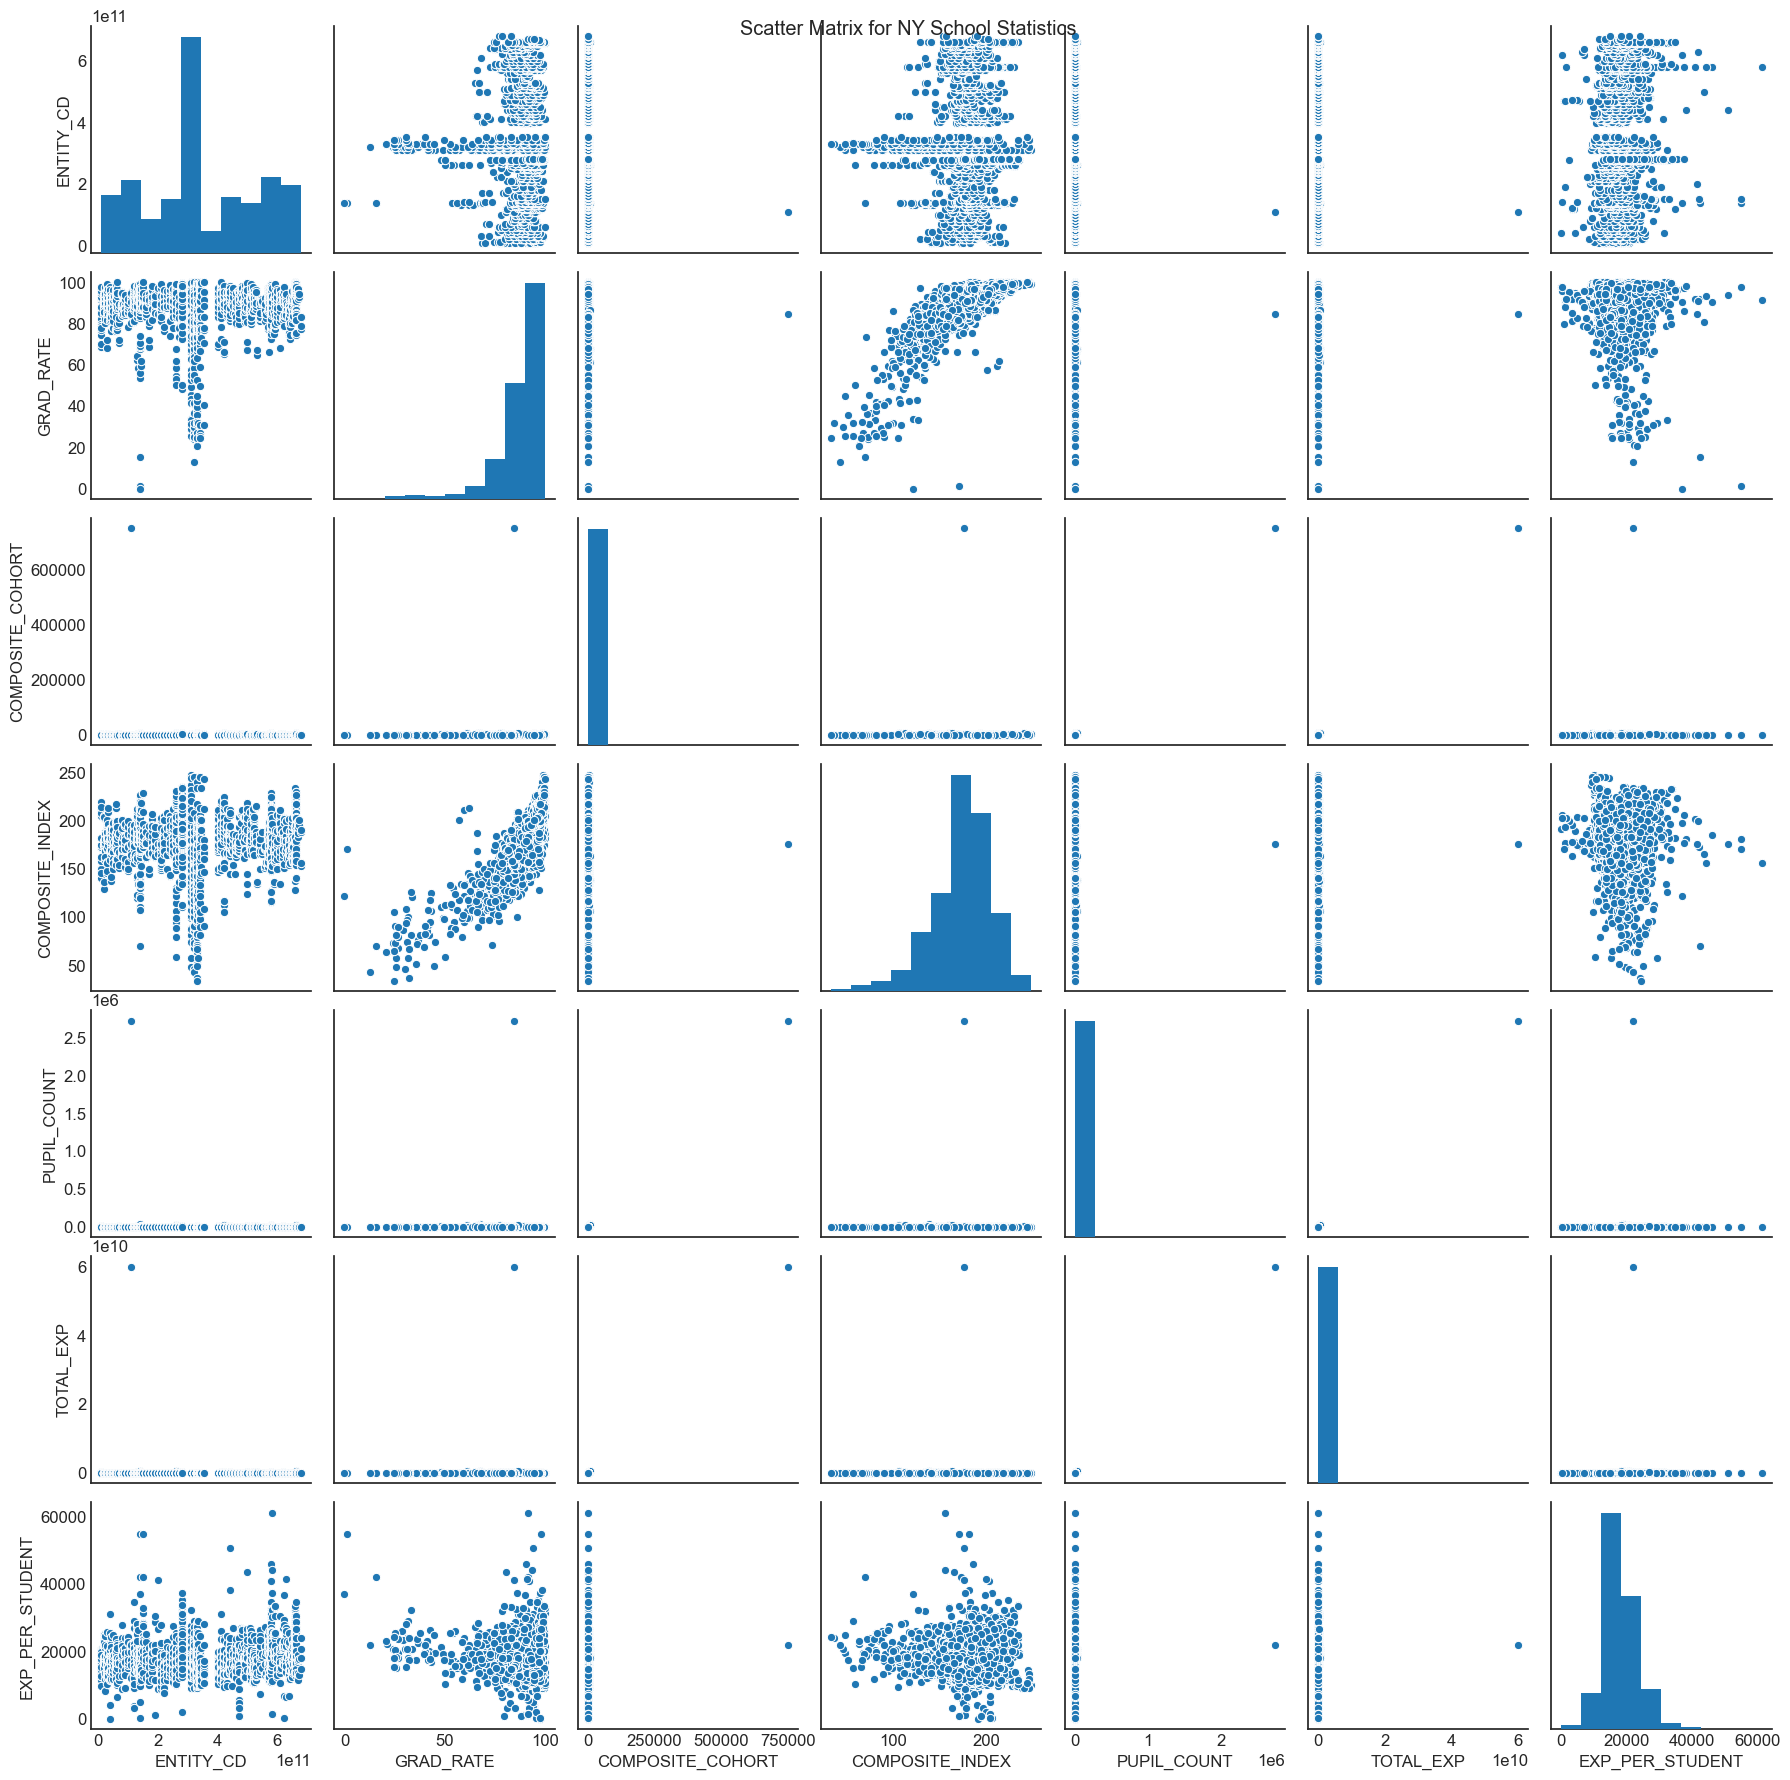

In [98]:
# scatter matrix to visualize bivariate relationships between combinations of variables
figure = sns.pairplot(df2)
figure.fig.suptitle("Scatter Matrix for NY School Statistics", y=1)
plt.show()

This Scatter Matrix helps us initially find possible pairwise relationships between variables, and if so, the nature of these relationships. From this matrix, we see that there seems to be a positive correlation with graduation rate and the composite index scores. This highlights the fact that graduation rate and the composite index are both indicators of success, learning, and improvement. If we compare both of these to a varible of concern, we will be able to get a better understanding of whether or not that variable affects the growth of students. Other graphs of interest include the expenditure of students vs graduation rate and the composite index. From a quick glance, it seems that high graduation rates and composite indices are not reserved for schools that spend more money per student.

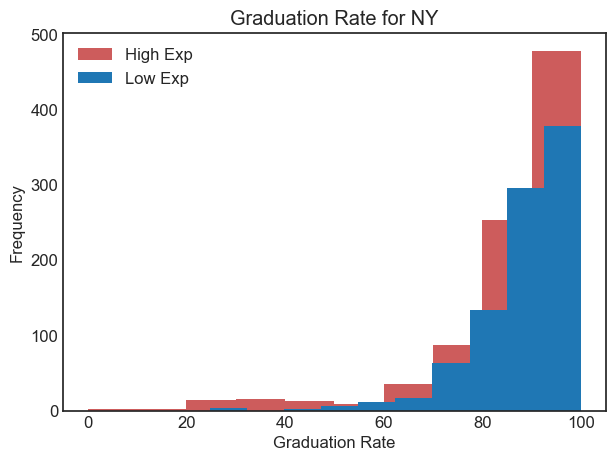

In [99]:
#histogram to visualize and compare the spread of graduation rates depending on expenditures per student
df2[df2['HIGH_LOW_EXP'] == "High_Exp"]['GRAD_RATE'].plot(kind='hist', title = 'Graduation Rate for NY', color = 'IndianRed')
df2[df2['HIGH_LOW_EXP'] == "Low_Exp"]['GRAD_RATE'].plot(kind='hist', title = 'Graduation Rate for NY')

plt.legend(["High Exp","Low Exp"])
plt.xlabel('Graduation Rate')
plt.ylabel('Frequency')

f2 = plt.gcf()

This histogram compares the number of schools with certain graduation rates with respect to whether the school spends a high amount or a low amount of money per student. As evident from the graph, we see that there is a larger number of schools with higher graduation rates if they have high expenditures. However, since both test groups are not of the same density, the comparison may not be the most effective.

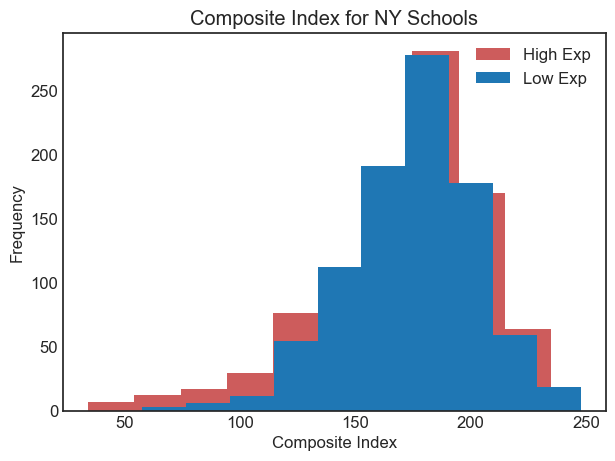

In [100]:
#histogram to visualize and compare the spread of composite test index scores by expenditure per student
df2[df2['HIGH_LOW_EXP'] == "High_Exp"]['COMPOSITE_INDEX'].plot(kind='hist', title = 'Composite Index for NY Schools', 
                                                               color = 'IndianRed')
df2[df2['HIGH_LOW_EXP'] == "Low_Exp"]['COMPOSITE_INDEX'].plot(kind='hist', title = 'Composite Index for NY Schools')

plt.legend(["High Exp","Low Exp"])
plt.xlabel('Composite Index')
plt.ylabel('Frequency')

f2 = plt.gcf()

This histogram compares the number of schools with certain composite index scores with respect to whether the school spends a high amount or a low amount of money per student. Demonstrated by the graph, the distribution seems very similar, with higher expending schools having more sample size in both the lower and upper ends of the index scale. From this, we can take away from that expenditure does not have a huge impact on the composite index score.

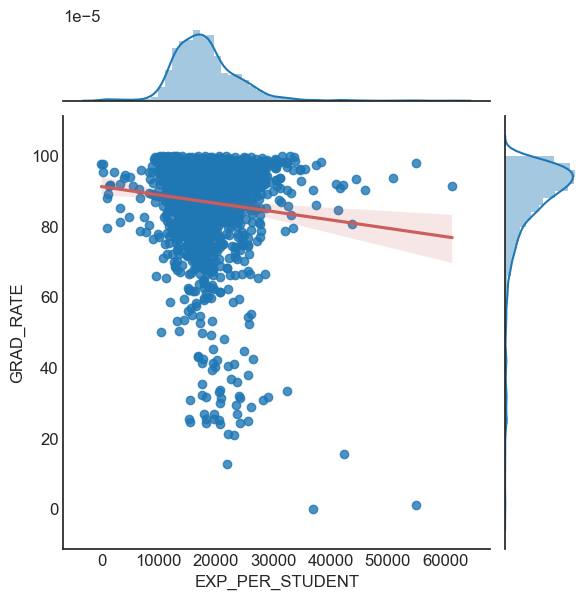

In [101]:
#scatterplots to find correlation

#variables in question
x = 'EXP_PER_STUDENT'
y = 'GRAD_RATE'
z = 'COMPOSITE_INDEX'

#expenditure per student and graduation rate
a = sns.jointplot(x, y, data=df2, kind='reg', joint_kws={'line_kws':{'color':'IndianRed'}})



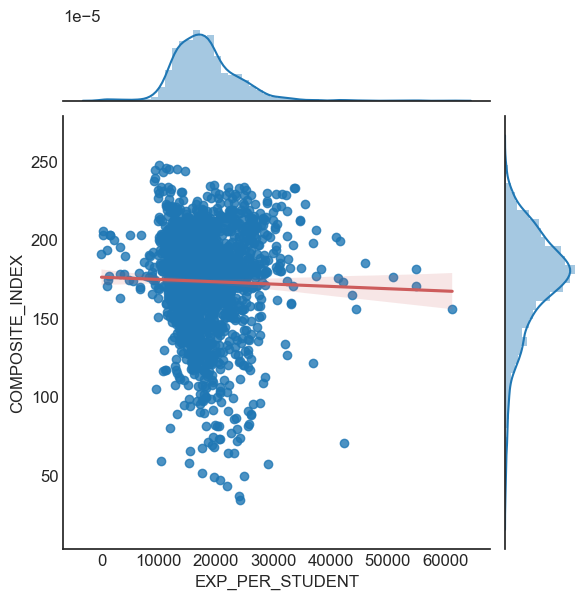

In [102]:
#expenditure per student and composite index score
b = sns.jointplot(x, z, data=df2, kind='reg', joint_kws={'line_kws':{'color':'IndianRed'}})

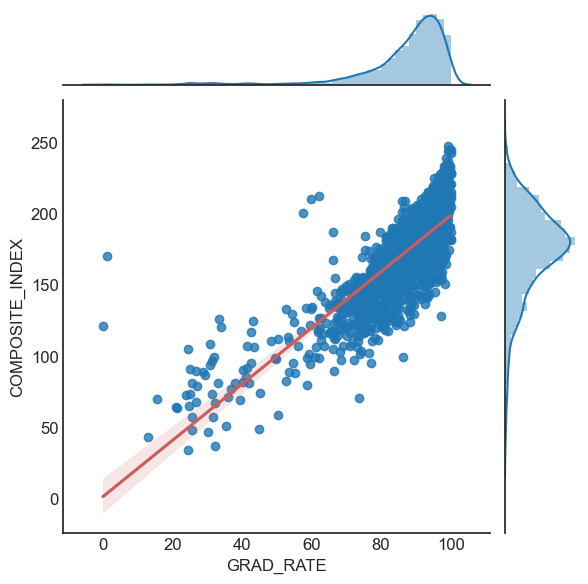

In [103]:
#graduation rate and composite index score
a = sns.jointplot(y, z, data=df2, kind='reg', joint_kws={'line_kws':{'color':'IndianRed'}})

These scatterplots compare the three variables in question: graduation rates, composite index scores, and expenditures per student. 

In plots 1 and 2, which compare the expenditure per student with graduation rate and composite index respectively, we see a slight negative correlation, which is suprising to us considering our hypothesis. Regardess of the line of best fit, visually speaking, it seems that most of the data is aggregated in one area. In plot 1, we see that outliers appear both significantly below and above the line. However, we also understand that any other factors may be playing a larger role in influencing these outcomes. 

Scatterplot three again demonstrates the strong correlation between graduation rate and composite index, again justifying our understaning that both together would create a good indicator of improvement and learning.

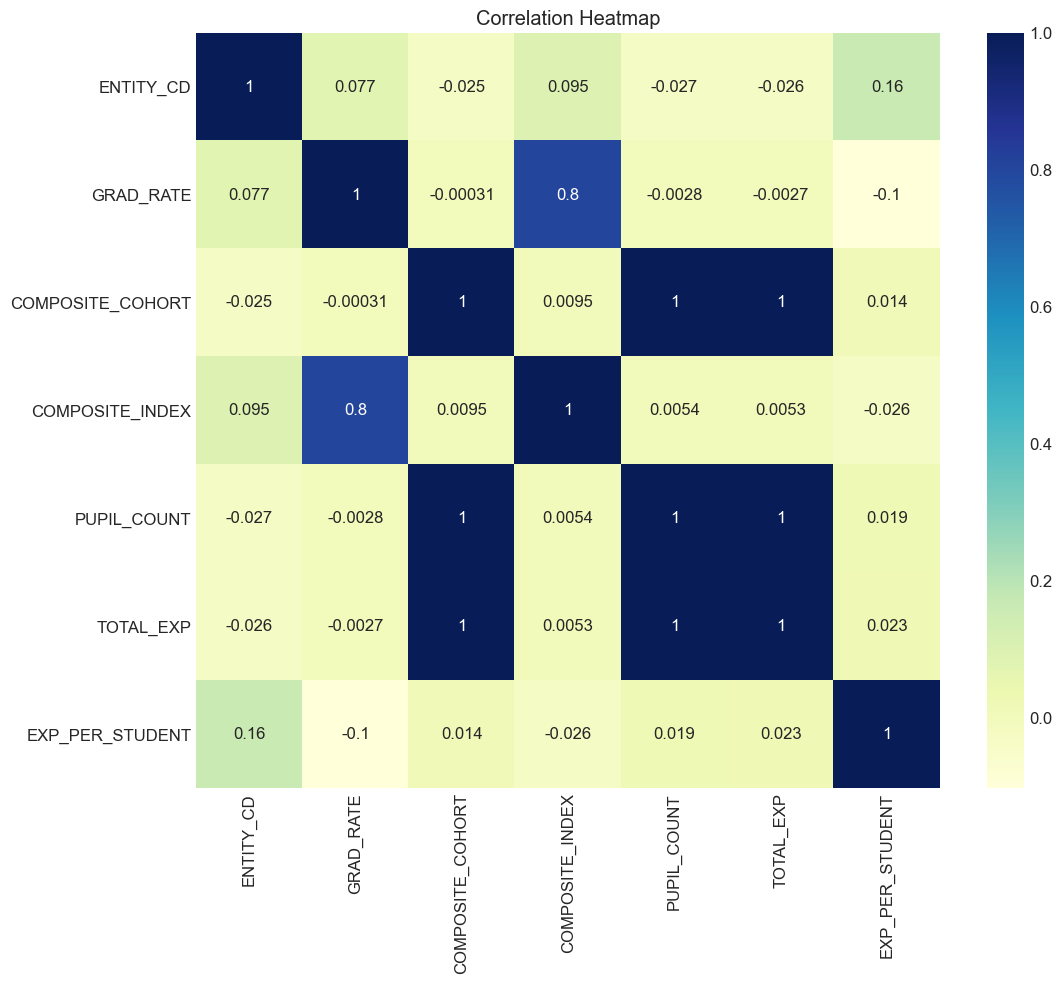

In [104]:
#correlation heatmap to visualize correlation in another format 
plt.figure(figsize = (12,10))
plt.title("Correlation Heatmap")
sns.heatmap(df2.corr(), annot=True, cmap="YlGnBu")
plt.show()

This correlation heatmap gives us a 2D correlation matrix between all these variables. Again, we see a high correlation between composite index and graduation rates. This does not affect our classification because the two are not used to explain the variation in each other but instead are used in conjuction to explain something else. All other variables display little to no correlations between one another.

In [105]:
#Looking at the overall entries for each school to avoid repitition
df2 = combined.loc[(combined['SUBJECT'] == "Combined")]

#### OLS Regression

To determine whether there is a concrete relation between expenditure and graduation rate or composite test scores, we will be creating respective OLS models and looking at the p values in comparison to alpha = 0.01. To avoid redundacy, first we need to remove all other subject entries for each school so each school entry is only counted once. From there, we can look at the visual distributions.

Next, we need to obtain the median value for per student expenditure because we will use this value to categorize per student expendature into 2 buckets, low and high expendature. From there we look at how these two groups interact with graduation rate and test scores to clearly demonstrate relations.

In [108]:
#Storing the median expenditure per student 
med_value = df2["EXP_PER_STUDENT"].median()
med_value

17387.0

In [109]:
#Organizing expenditure values into two categories by splitting across the median value 
df2 = df2.assign(**{"HIGH_LOW_EXP" : df2['EXP_PER_STUDENT'].apply(lambda x : 'High_Exp' if x >= med_value else 'Low_Exp')})

After we have organized our data accordingly, we can insert our columns of interest into an OLS model to see the regression results.

In [110]:
#Creating an OLS model with respect to expenditure and graduation rate
outcome_1, predictors_1 = patsy.dmatrices('GRAD_RATE ~ HIGH_LOW_EXP', df2)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [111]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:              GRAD_RATE   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     21.04
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           4.82e-06
Time:                        23:32:01   Log-Likelihood:                -7241.2
No. Observations:                1821   AIC:                         1.449e+04
Df Residuals:                    1819   BIC:                         1.450e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

When using an alpha value of 0.01, the p value 0.125 is larger than alpha so we cannot say that expenditure per student significantly predicts graduation rate.

In [112]:
#Creating an OLS model with respect to expenditure and composite index
outcome_2, predictors_2 = patsy.dmatrices('COMPOSITE_INDEX ~ HIGH_LOW_EXP', df2)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

In [113]:
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:        COMPOSITE_INDEX   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.357
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.125
Time:                        23:32:01   Log-Likelihood:                -8886.2
No. Observations:                1821   AIC:                         1.778e+04
Df Residuals:                    1819   BIC:                         1.779e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

When using an alpha value of 0.01, the p value 0.000 is smaller than alpha so we can say that expenditure per student significantly predicts composite index. Although 0.000 for a p value may appear as obscure, this is due to the fact that OLS only offers 3 decimal digits and any value smaller than 0.001 and greater than 0.000 will round down. Nevertheless, this is a very interesting development considering how financially investing in students can drive performance.

#### Denisty Distributions of Graduation Rates and Composite Index

In [114]:
# Selecting the test scores for the Combined section in the final dataset and assigning a new column that assigns a group
# based on whether the EXP_PER_STUDENT is greater than or less than the median funding. We used median as it gave a more
# even split on the data.

temp = combined[combined['SUBJECT'] == 'Combined']
median_funds = np.median(temp['EXP_PER_STUDENT'])
print('Median Funds: ' + str(median_funds))

# Assigning the column of funding groups
temp = temp.assign(fund_group = temp['EXP_PER_STUDENT'].apply(lambda x : 'High_Exp' if x >= median_funds else 'Low_Exp'))

Median Funds: 17387.0


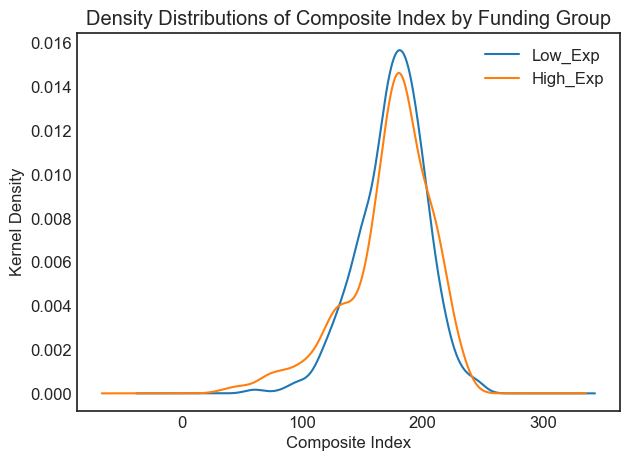

In [115]:
# The groups that were created are used to group the data and plot the distribution of scores between the two groups or
# the distribution of the COMPOSITE_INDEX.

low = temp[temp['fund_group'] == 'Low_Exp']['COMPOSITE_INDEX']
high = temp[temp['fund_group'] == 'High_Exp']['COMPOSITE_INDEX']

# Kernel density plot of each of the groups
low.plot(kind = 'kde')
high.plot(kind = 'kde')

# Setting axes titles and labels
plt.legend(['Low_Exp', 'High_Exp'])
plt.xlabel('Composite Index')
plt.ylabel('Kernel Density')
plt.title('Density Distributions of Composite Index by Funding Group')

plt.show()

The graph above is the density distribution of the composite index of each of the different funding groups. The low expenditure and high expenditure groups seem to follow relatively the same distribution for their test scores. There does not seem to be much difference between the two groups when it comes to performance. The given distribution indicates that we must use other metrics to analyze the difference of scores between the two groups such as the difference of means as their overall distributions are relatively the same.

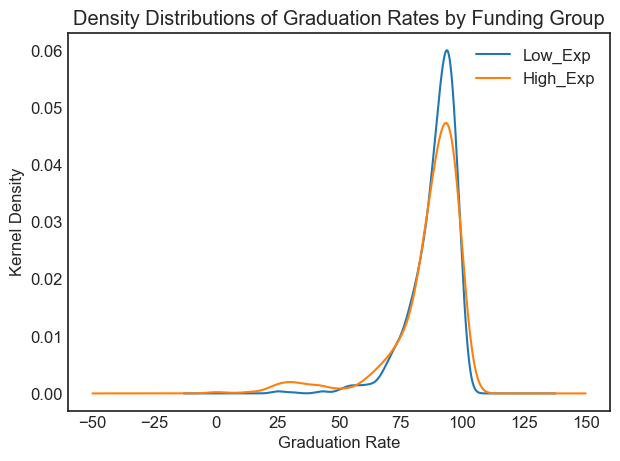

In [116]:
# The groups that were created are used to group the data and plot the distribution of graduation rates between
# the two groups.

low = temp[temp['fund_group'] == 'Low_Exp']['GRAD_RATE']
high = temp[temp['fund_group'] == 'High_Exp']['GRAD_RATE']

# Kernel Density plot for each funding group
low.plot(kind = 'kde')
high.plot(kind = 'kde')

# Labeling of axes and graph formatting
plt.legend(['Low_Exp', 'High_Exp'])
plt.xlabel('Graduation Rate')
plt.ylabel('Kernel Density')
plt.title('Density Distributions of Graduation Rates by Funding Group')

plt.show()

The graph above is the density distribution of the graduation rates of each of the different funding groups. The low expenditure and high expenditure groups seem to follow relatively the same distribution of graduation rates. There does not seem to be much difference between the two groups other than the density centered around the mean. The low expenditure group seems to have a higher density centered around the mean as there's a taller peak in the distribution.

#### Permutation Test: Difference of Means

Although the distribution plots of composite indices and graduation rates upon splitting the funding groups by the funding median appear to be similar, we want to test whether there is a difference between the academic performance of students that belong to the lower and higher expenditure groups. Since their distributions were so similar, we expect the permutation test to favor the null hypothesis as their means will also be likely similar, resulting in a low difference in means in each sample.

*Question*: Does the amount of funding per student each school recieves dictate students' academic performance such as composite index and graduation rates in NY public school districts?

*Test*: Permutation test using difference of means between the COMPOSITE_RATES/GRAD_RATE based on funding group.

*Null Hypothesis*: The distribution of COMPOSITE_INDEX/GRAD_RATE comes from the same overall distribution.

*Alternative Hypothesis*: There's a difference in COMPOSITE_INDEX/GRAD_RATES based on the funding group that each school belongs to.

*Level of Significance*: 0.05

In [117]:
# Permutation test function with the difference of means

def permutation_mean(temp, col):
    # initialization of initial variables
    stats = []
    n_reps = 1000
    
    # calculation of the observed difference of means in our original data before sampling
    low = temp[temp['fund_group'] == 'Low_Exp'][col]
    high = temp[temp['fund_group'] == 'High_Exp'][col]
    obs = np.mean(high) - np.mean(low)
    
    # permutation test
    for x in range(n_reps):
        # sampling from and shuffling the funding groups to reassign the groups
        shuffle = temp['fund_group'].sample(replace = False, frac = 1).reset_index(drop = True)
        shuffled = temp.assign(**{'fund_group': shuffle})
        
        # recalculation of the test stat for the new sample
        stat = (np.mean(shuffled[shuffled['fund_group'] == 'High_Exp'][col]) 
                - np.mean(shuffled[shuffled['fund_group'] == 'Low_Exp'][col]))
        stats.append(stat)

    # computing p_value by comparing the test stats to the inital observed value
    p_val = np.count_nonzero(np.array(stats) >= obs) / n_reps
    
    return stats, p_val, obs

In [118]:
# Running the permutation test on COMPOSITE_INDEX based on fund_group

scores_by_group = temp[['fund_group', 'COMPOSITE_INDEX']].reset_index(drop = True)
stats, p_val, obs = permutation_mean(scores_by_group, 'COMPOSITE_INDEX')
print('p_value: ' + str(p_val))

p_value: 0.931


In [119]:
# Running the permutation test on GRAD_RATE based on fund_group

gr_by_group = temp[['fund_group', 'GRAD_RATE']].reset_index(drop = True)
stats, p_val, obs = permutation_mean(gr_by_group, 'GRAD_RATE')
print('p_value: ' + str(p_val))

p_value: 1.0


Upon running the permutation test on GRAD_RATE and COMPOSITE_INDEX based on the fund_groups, we see that the p-values were 1.0 and 0.928 respectively, indicating that we fail to reject the null hypothesis that the academic performance metrics of the funding groups are drawn from the same distribution. This is expected as the kernel density plots of composite index and graduation rates between the different funding groups followed the similar approixmate distribution. This means that we cannot say whether belonging to a specific funding group has an impact on academic performance according to the difference of means permutation test.

#### Permutation Test: KS-Statistic

While the difference of means test favored the null hypothesis, we would like to use a different metric to rerun the permutation test. Here, we chose the KS-statistic (Kolmogorov–Smirnov test) that checks whether the composite index and graduation rates of the different funding groups belong to the same continuous probability distribution. We chose this test since the distributions of the academic performance by funds followed almost the same distribution, causing the difference in means test to favor the null as the means are close together.

*Question*: Does the amount of funding per student each school recieves dictate students' academic performance such as composite index and graduation rates in NY public school districts?

*Test*: Permutation test using KS-Statistic that checks whether each of the groups belong to the same continuous distribution.

*Null Hypothesis*: The distribution of COMPOSITE_INDEX/GRAD_RATE comes from the same overall distribution.

*Alternative Hypothesis*: There's a difference in COMPOSITE_INDEX/GRAD_RATES based on the funding group that each school belongs to.

*Level of Significance*: 0.05

In [120]:
# Permutation test function with the KS-statistic

def permutation_ks(temp, col):
    # initialization of initial variables
    stats = []
    n_reps = 1000
    
    # calculation of the observed difference of means in our original data before sampling
    low = temp[temp['fund_group'] == 'Low_Exp'][col]
    high = temp[temp['fund_group'] == 'High_Exp'][col]
    obs = ks_2samp(high, low).statistic
    
    for x in range(n_reps):
        # sampling from and shuffling the funding groups to reassign the groups
        shuffle = temp['fund_group'].sample(replace = False, frac = 1).reset_index(drop = True)
        shuffled = temp.assign(**{'fund_group': shuffle})
        
        # recalculation of the test stat for the new sample
        stat = ks_2samp(shuffled[shuffled['fund_group'] == 'High_Exp'][col],
                       shuffled[shuffled['fund_group'] == 'Low_Exp'][col]).statistic
        stats.append(stat)

    # computing p_value by comparing the test stats to the inital observed value
    p_val = np.count_nonzero(np.array(stats) >= obs) / n_reps
    
    return stats, p_val, obs

In [121]:
# Running the permutation test on GRAD_RATE based on fund_group

gr_by_group = temp[['fund_group', 'GRAD_RATE']].reset_index(drop = True)
stats, p_val, obs = permutation_ks(gr_by_group, 'GRAD_RATE')
print('p_value: ' + str(p_val))

p_value: 0.045


In [122]:
# Running the permutation test on COMPOSITE_INDEX based on fund_group

scores_by_group = temp[['fund_group', 'COMPOSITE_INDEX']].reset_index(drop = True)
stats, p_val, obs = permutation_ks(scores_by_group, 'COMPOSITE_INDEX')
print('p_value: ' + str(p_val))

p_value: 0.021


Upon using KS-Statistic as our metric for the permutation test, we recieved different results than those of the difference of means permutation test. The p-value for running this permutation test on GRAD_RATE based on funding group came out to be 0.54, which is above the level of significance. Therefore, we fail to reject the null hypothesis that graduation rates between the different funding groups come from the same continuous distribution. For COMPOSITE_INDEX, however, the p-value came to be 0.018, which is below the level of significance. Therefore, we reject the null hypothesis in favor of the alternate hypothesis that the composite indices of the two funding groups belong to separate distribution, indicating that there is some evidence to believe that funding somewhat influences academic performance. This test, however, does not provide a concrete result and only indicates that there is some evidence to believe the claim. There must be additional tests done to concretely establish this correlation.

Text(0.5, 1.0, 'Permutation Test of Composite Index by KS-Statistic Between Different Funding Groups')

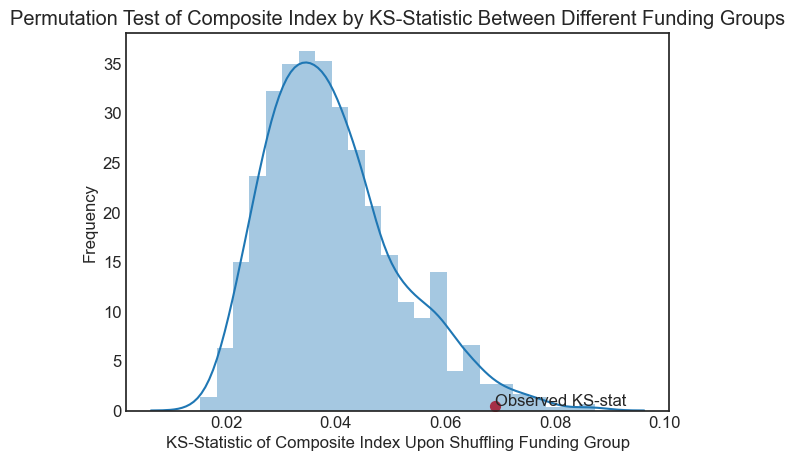

In [123]:
#pd.Series(stats).plot(kind = 'hist')
sns.distplot(stats)
plt.scatter(obs, 0.5, color = 'red', s = 50)
plt.annotate("Observed KS-stat", (obs, 0.5))

plt.xlabel('KS-Statistic of Composite Index Upon Shuffling Funding Group')
plt.ylabel('Frequency')
plt.title('Permutation Test of Composite Index by KS-Statistic Between Different Funding Groups')

This graph shows the distribution of KS-Statistics that came from the permutation test being performed on COMPOSITE_INDEX based on funding_group. The point that is visible is the observed KS-statistic of the original dataset before sampling. Everything to the right of the point are the deviations from the observed KS-statistic that make up the calculation of the p-value. The acceptable KS-stats for the data come to the left of the point, while the deviations from the norm occur to the right of the point.

# Ethics & Privacy

With a research question involving individual student scores, it is important to find data that upholds the privacy of personal information. This means that we want information that doesn’t have any confidential information such as names or addresses. As a result, the dataset we chose is all public record, meaning that we are respecting the privacy of the staff and student identities.  These efforts aim to provide accurate data for all involved parties to actively work on improving student education. 

Although this data comes from a reputable source, we realize that no data is completely error-free of biases. Our potential datasets are collected for the New York area, separated by both schools and counties, meaning an extrapolation of this data beyond the counties with recorded data could be harmful and problematic. In addition, an unintended consequence of this project could result in a reader assuming that funding is the only direct reason for the differences in test scores among students. Although a correlation may exist, our goal is not to persuade readers to believe that there is only one factor affecting student achievement. In the case that a correlation is found, emphasising this point in the conclusion and discussion would help avoid this misunderstanding.

Another potential bias is chronological bias. This dataset is only from the school year 2018-2019. This means that our work is only describing and analyzing data from a particular year. We should not use this data to extrapolate what this might mean for other years because there isn’t nearly enough data to prove that what we’re considering or discussing might be a predictable trend. 

# Conclusion & Discussion

In conclusion, the goal of our project was to determine the correlation between funding and the different types of academic performance, such as state test scores and graduation rates, in the state of New york. 
From our initial exploration of the data, we found a strong correlation between the composite index score, an academic test score, and graduation rates. This demonstrates the idea that both the composite index and graduation rates can be used as markers of academic performance. As students continue to score higher on their exams, they are more likely to graduate. These two means of record are used in conjunction to explain the impact that another variable, in this case expenditures per pupil, causes. 

After that, we began our analyses and testing, and we compared the expenditures per pupil against graduation rates and composite test scores. We chose to break expenditures into low and high, based on the median, to get a more even split that was not influenced by outliers. After analyzing through both OLS regression and permutation tests,  we came to the same conclusion. The difference in graduation rates in relation to expenditures was not statistically significant, but the difference of composite test scores in relation to expenditures was statistically significant. Therefore, we cannot say that increased funding increases all types of academic performance, in this case being graduation rates and test scores. However, this means that in this specific dataset, we would accept the alternate hypothesis that increased funding increases test scores in the public school districts of New York. 

This information can be used to address disparities in education that are caused by differences in funding. This funding can be affected by a variety of factors, such as property rates, crime rates, location, staffing, and so on. To provide an equitable future for these students in New York, it is important to note how important receiving adequate funding can be. Even if funding isn’t directly related to graduation rates, it is related to test scores. These test scores are in turn quite related to other academic issues that impact students’ futures, such as college acceptance, drop-out rates, and so much more.

Furthermore, it would be interesting to see how this study extends beyond New York. The dataset we worked with recorded information from New York districts and schools, however, these are not reliable indicators for schools all around the country and the world. It would be interesting to see how funds play a role in schools in a different location, which may have different allocation policies and even a distinctive focus on which areas of education need funding. Another interesting take would be to analyze the impact of funding on different education departments. Funding could potentially be allocated unevenly to the different departments, affecting the ELA, Math, Social Studies, and Science scores on the academic performance exams. This would help provide more insight on the inner workings of schools and districts.


# Team Contributions

- **Sanskriti Chadha:** Responsible for using the cleaned dataset to perform analysis or generate visualizations to properly see the trends in data.
- **Arjun Gujral:** Responsible for using the cleaned dataset to perform analysis or generate visualizations to properly see the trends in data.
- **Viswesh Uppalapati:** Responsible for data wrangling the datasets into a single dataset that is easy to work with. Responsible for helping Arjun with the analysis of the data and revising and improving upon all the code and making sure nothing was missed along the coding process.
- **Elakya Thirumoorthy:** Responsible for writing the textual analysis of the group’s findings and writing the other sections of the report, such as the background, research, and ethics/privacy.
- **Everyone:** Responsible for properly attending project meetings and completing the assigned work by the decided upon deadlines. Responsible for helping others with their work when needed. Responsible for discussing the hypothesis, conclusion, and the overall report. 